In this notebook, i convert .mat file in python readble file .csv.

From the *all_test_faults.csv* file, which contains all the **test** data errors, that is, all the loads **without** the 0 Load condition.

IR014_1 fault was skipped because it has a strange structure.

**Notice** that load condition value is not used for labeling the data.



Dataset site: https://engineering.case.edu/bearingdatacenter/download-data-file

# Load .mat vibration data

In [ ]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get the file path to the directory that contains the file you want to read.
file_path = '/content/drive/MyDrive/TESI/Data_raw'

load_dir = os.listdir(file_path)

# Create a list of path for each load folder
load_dir_list = []

for load_type in load_dir:
  single_load_path = os.path.join(file_path, load_type)
  load_dir_list.append(single_load_path)

# Remove 0 Load fault, have calculated yet
load_dir_list.remove(os.path.join(file_path, '0_Load'))

print('load_dir_list: ' ,load_dir_list)

load_dir_list:  ['/content/drive/MyDrive/TESI/Data_raw/3_Load', '/content/drive/MyDrive/TESI/Data_raw/1_Load', '/content/drive/MyDrive/TESI/Data_raw/2_Load']


In [ ]:
file_path_dict = {}

# Get vibration file for each load
for load_path in load_dir_list:

  files = os.listdir(load_path)

  for file in files:
    name = os.path.join(load_path, file)

    file_path_dict[name] = file[:-6]
print(file_path_dict)

{'/content/drive/MyDrive/TESI/Data_raw/3_Load/Normal_3.mat': 'Normal', '/content/drive/MyDrive/TESI/Data_raw/3_Load/IR007_3.mat': 'IR007', '/content/drive/MyDrive/TESI/Data_raw/3_Load/B007_3.mat': 'B007', '/content/drive/MyDrive/TESI/Data_raw/3_Load/OR007-6_3.mat': 'OR007-6', '/content/drive/MyDrive/TESI/Data_raw/3_Load/OR007-3_3.mat': 'OR007-3', '/content/drive/MyDrive/TESI/Data_raw/3_Load/OR007-12_3.mat': 'OR007-12', '/content/drive/MyDrive/TESI/Data_raw/3_Load/IR014_3.mat': 'IR014', '/content/drive/MyDrive/TESI/Data_raw/3_Load/B014_3.mat': 'B014', '/content/drive/MyDrive/TESI/Data_raw/3_Load/OR014-6_3.mat': 'OR014-6', '/content/drive/MyDrive/TESI/Data_raw/3_Load/IR021_3.mat': 'IR021', '/content/drive/MyDrive/TESI/Data_raw/3_Load/B021_3.mat': 'B021', '/content/drive/MyDrive/TESI/Data_raw/3_Load/OR021-6_3.mat': 'OR021-6', '/content/drive/MyDrive/TESI/Data_raw/3_Load/OR021-3_3.mat': 'OR021-3', '/content/drive/MyDrive/TESI/Data_raw/3_Load/OR021-12_3.mat': 'OR021-12', '/content/drive/MyD

In [ ]:
file_path_dict = dict(sorted(file_path_dict.items(), key=lambda item: item[1]))

print(file_path_dict)

{'/content/drive/MyDrive/TESI/Data_raw/3_Load/B007_3.mat': 'B007', '/content/drive/MyDrive/TESI/Data_raw/1_Load/B007_1.mat': 'B007', '/content/drive/MyDrive/TESI/Data_raw/2_Load/B007_2.mat': 'B007', '/content/drive/MyDrive/TESI/Data_raw/3_Load/B014_3.mat': 'B014', '/content/drive/MyDrive/TESI/Data_raw/1_Load/B014_1.mat': 'B014', '/content/drive/MyDrive/TESI/Data_raw/2_Load/B014_2.mat': 'B014', '/content/drive/MyDrive/TESI/Data_raw/3_Load/B021_3.mat': 'B021', '/content/drive/MyDrive/TESI/Data_raw/1_Load/B021_1.mat': 'B021', '/content/drive/MyDrive/TESI/Data_raw/2_Load/B021_2.mat': 'B021', '/content/drive/MyDrive/TESI/Data_raw/3_Load/IR007_3.mat': 'IR007', '/content/drive/MyDrive/TESI/Data_raw/1_Load/IR007_1.mat': 'IR007', '/content/drive/MyDrive/TESI/Data_raw/2_Load/IR007_2.mat': 'IR007', '/content/drive/MyDrive/TESI/Data_raw/3_Load/IR014_3.mat': 'IR014', '/content/drive/MyDrive/TESI/Data_raw/1_Load/IR014_1.mat': 'IR014', '/content/drive/MyDrive/TESI/Data_raw/2_Load/IR014_2.mat': 'IR014

# Create DataFrame with all data and save it in .csv format

In [ ]:
# Create a DataFrame empty

df=pd.DataFrame(columns=['DE_data','fault'])


Apply previous methods for all .mat file

In [ ]:
# Skip this file with double coloum of data ?!

skip_path = r'/content/drive/MyDrive/TESI/Data_raw/1_Load/IR014_1.mat'

In [ ]:
for path in file_path_dict:

  if skip_path != path:

    mat = scipy.io.loadmat(path)

    key_list = list(mat.keys())
    key_target = key_list[3]

    DE_data = mat.get(key_target)
    fault = np.full((len(DE_data), 1), file_path_dict[path])  #Create a label

    df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

    df = pd.concat([df,df_temp],axis=0)

print(df['fault'].unique())

['B007' 'B014' 'B021' 'IR007' 'IR014' 'IR021' 'Normal' 'OR007-12'
 'OR007-3' 'OR007-6' 'OR014-6' 'OR021-12' 'OR021-3' 'OR021-6']


In [ ]:
# Create a csv with all data

df.to_csv('all_test_faults.csv',index=False)

# Check .csv data and show it

In [ ]:
df = pd.read_csv('all_test_faults.csv')

In [ ]:
# Check reading and show data

df

,DE_data,fault
0,0.253050,B007
1,0.257431,B007
2,0.238447,B007
3,0.218838,B007
4,0.191718,B007
...,...,...
19468091,-0.137720,OR021-6
19468092,-0.021701,OR021-6
19468093,0.177784,OR021-6
19468094,0.441539,OR021-6


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['DE_data'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['DE_data'], **{})
chart

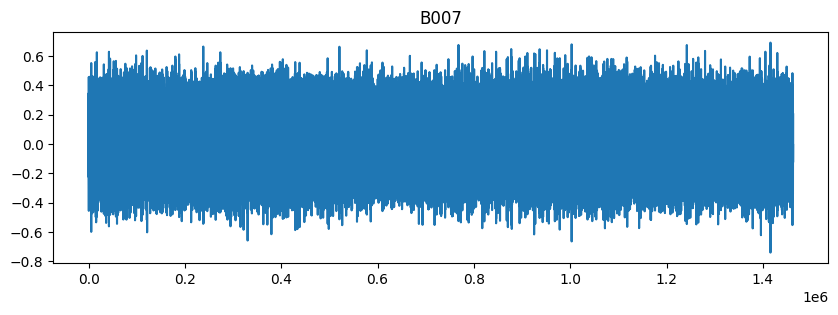

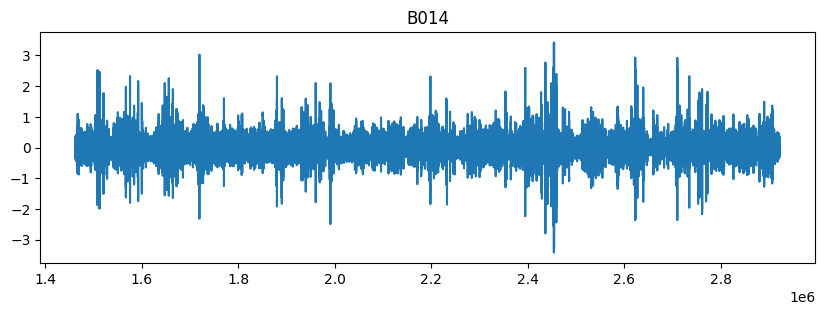

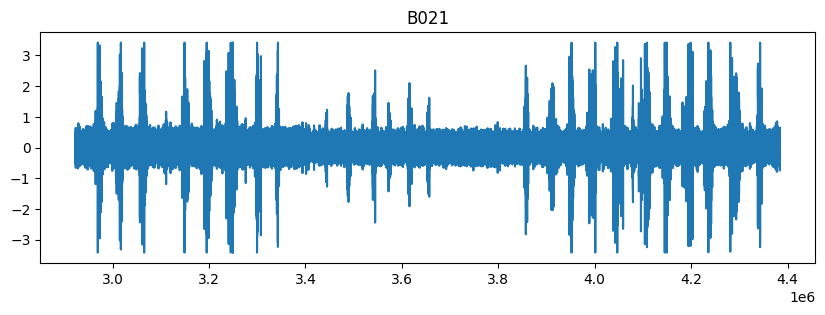

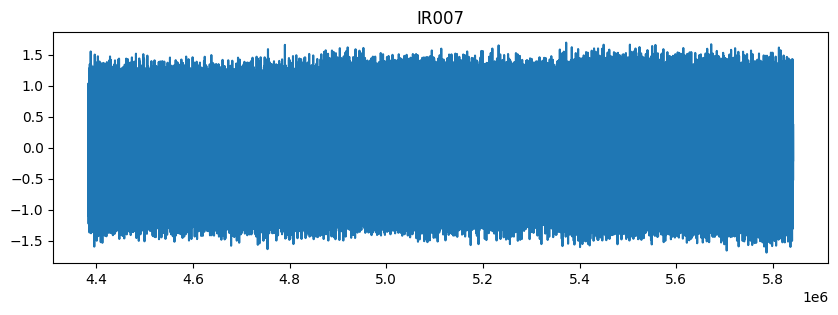

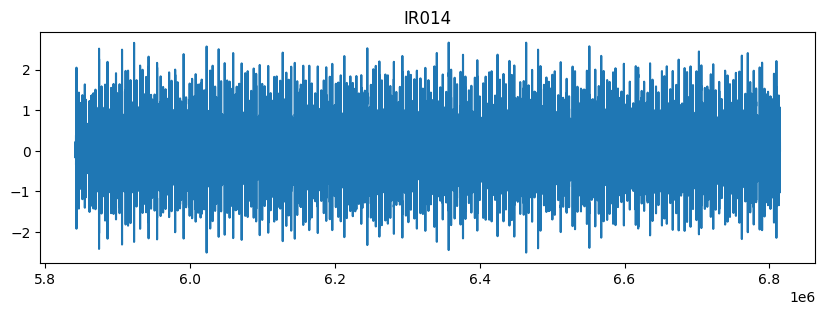

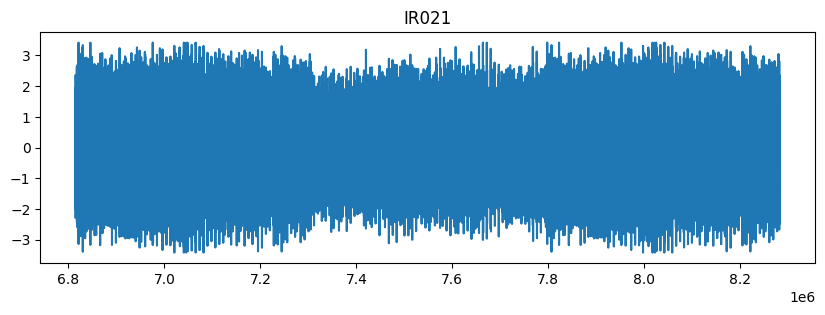

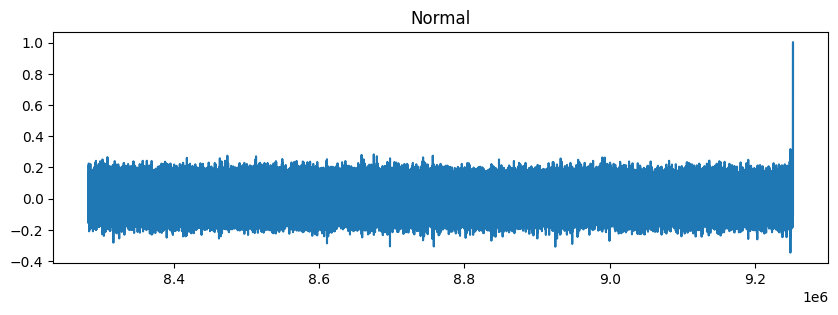

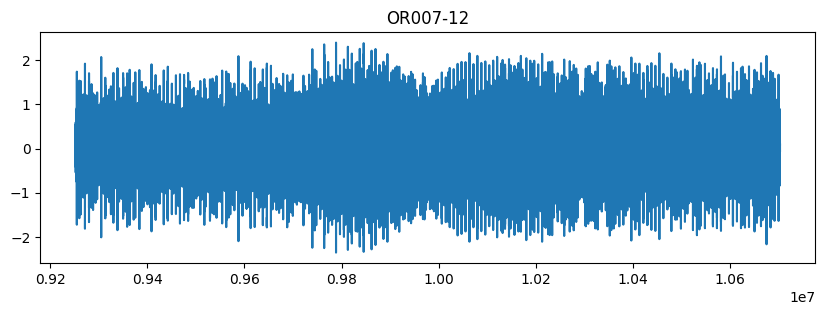

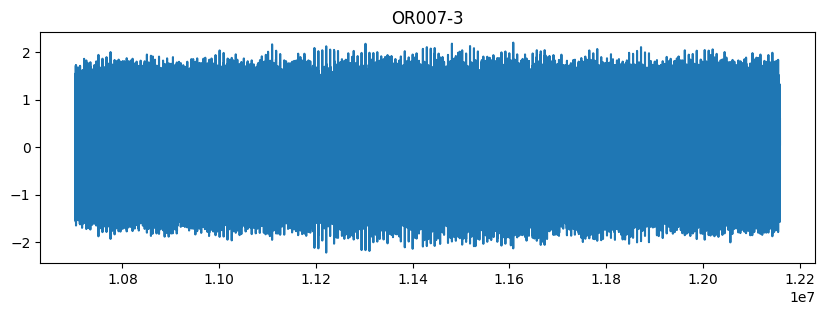

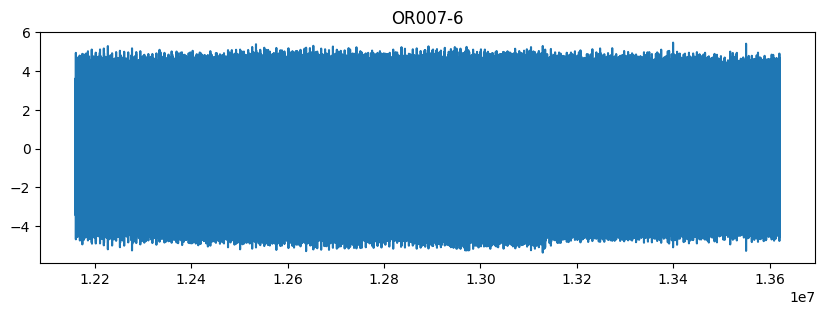

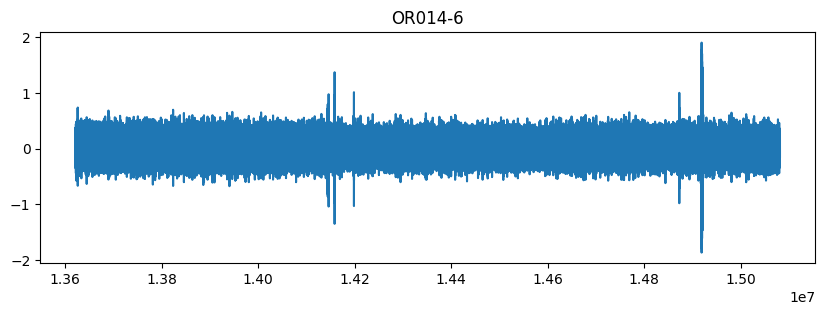

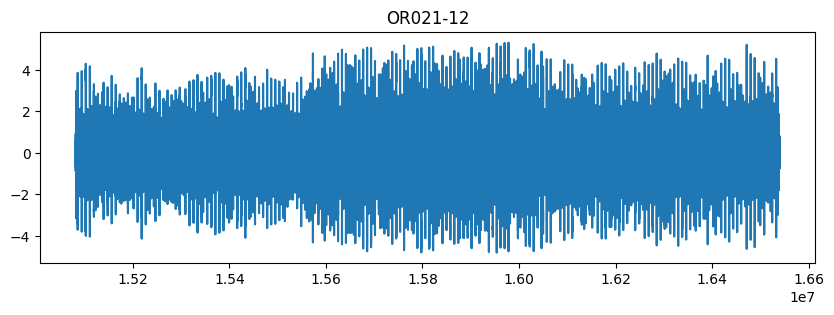

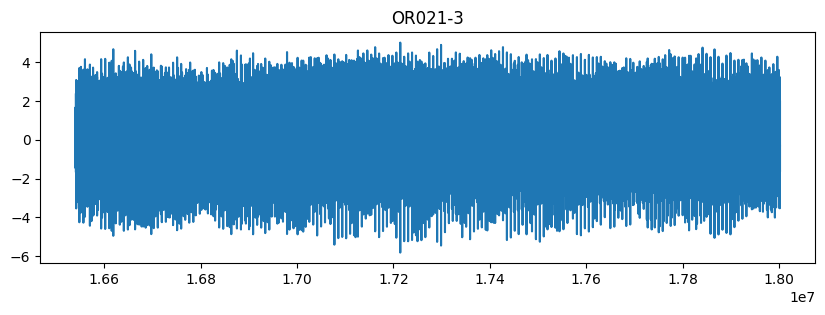

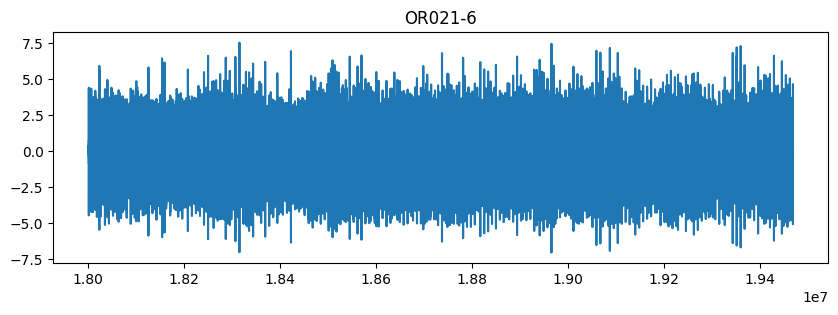

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()